**Project Details**

| | Details |
|----------|---------|
| Author   | Alfrethanov Christian Wijaya |
| Dataset  | Titanic.csv |
| Goal     | Perform Data Preprocessing / Preparation / Cleaning to do Machine Learning Modelling with LogisticRegression algorithm. |

# **DATA UNDERSTANDING**
### Dataset : **Titanic.csv**

<h2><b>Data Understanding</b></h2>

**Titanic.csv** is a dataset that stores data related to the passengers that was involved in the sinking incident of the *Titanic* ship. The classification task will involve a binary variable, where '1' indicates that the passenger survived and '0' indicates that the passenger did not survive. To gain a better understanding of the problem, we will now proceed with a brief overview of the dataset and its values.

<br>

**Metadata**

**Titanic.csv** Dataset :

| # | Data | Description
| --- | --- | --- 
| 1 | PassengerId | Passenger's ID
| 2 | Survived | Survived / Not
| 3 | Pclass | Passenger's Ticket Class
| 4 | Name | Passenger's Name
| 5 | Sex | Passenger's Sex / Gender
| 6 | Age | Passenger's Age
| 7 | SibSp | Passenger's Siblings / Spouse that was also a passenger of Titanic
| 8 | Parch | Passanger's Parents / Children that was also a passenger of Titanic
| 9 | Ticket | Passenger's Ticket Number
| 10 | Fare | Passenger's Fare
| 11 | Cabin | Passenger's Cabin Number
| 12 | Embarked | Passenger's Port of Embarkation

<br>

-------
<br>
<h2><b>Business Goal</b></h2>

1. Do an analysis on the factors that could influence the survival rate of the passengers that was in the sinking incident of the Titanic ship.
2. Do a preprocessing (data preparation) on Titanic.csv dataset, which includes :

  - Data Cleaning
  - Data Scaling
  - Dealing with an Imbalance Dataset

---

---

**START**

---

**Import Libraries** and **Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Titanic.csv')

**Data Understanding**

In [ ]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **DATA CLEANING**

**Handling Irrelevant Data**

In [ ]:
df = df.drop(['PassengerId','Name'], axis=1)

↑ Drop 'PassengerId' column because it has unique values in all of its rows and not relevant to the problem that will be analyzed ↑

↑ Drop 'Name' column because it's not relevant to the problem that will be analyzed ↑

In [ ]:
for col in df.columns:
    uniq=df[col].unique().tolist()
    print(f'num of unique values of {col} colomn is:  {len(uniq)}')

num of unique values of Survived colomn is:  2
num of unique values of Pclass colomn is:  3
num of unique values of Sex colomn is:  2
num of unique values of Age colomn is:  89
num of unique values of SibSp colomn is:  7
num of unique values of Parch colomn is:  7
num of unique values of Ticket colomn is:  681
num of unique values of Fare colomn is:  248
num of unique values of Cabin colomn is:  148
num of unique values of Embarked colomn is:  4


In [ ]:
df = df.drop(['Ticket'],axis=1)

↑ Drop 'Ticket' column because it has too much unique values (more than 50% of total rows in 'Ticket' column) and not relevant to the problem that will be analyzed ↑

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
df.shape

(891, 9)

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

**Handling Missing Values**

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
df = df.drop(['Cabin'],axis=1)

↑ Drop 'Cabin' column because it has too much Missing Values (more than 50% of total rows in 'Cabin' column) ↑

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

↑ Filling the Missing Values in 'Age' column with the **mean value** of 'Age' data ↑

↑ Filling the Missing Values in 'Embarked' column with **mode** because it has categorical data type ↑

In [ ]:
df['Age'].isnull().sum()

0

In [ ]:
df['Embarked'].isnull().sum()

0

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Handling Outliers**

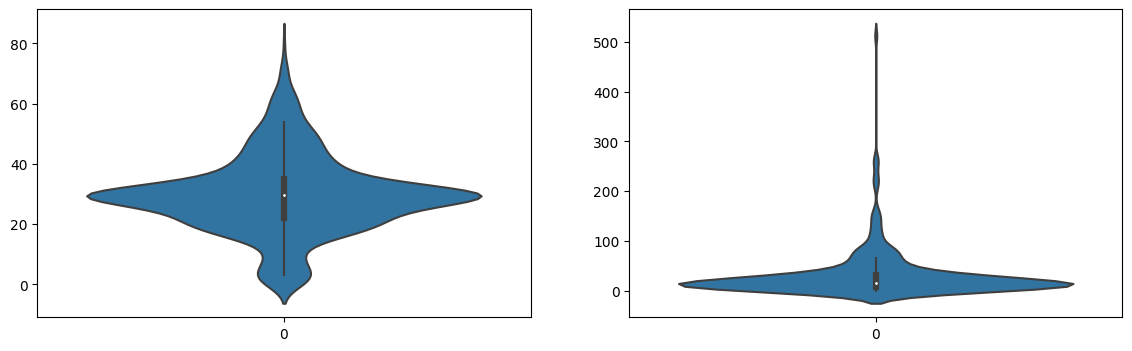

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.violinplot(df['Age'])
plt.subplot(1,2,2)
sns.violinplot(df['Fare'])
plt.show()

↑ Column 'Age' and 'Fare' have a possibility of having outliers data in their rows ↑

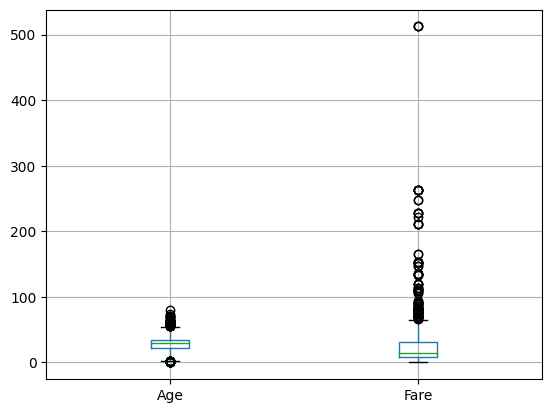

In [ ]:
df[['Age','Fare']].boxplot()
plt.show()

↑ Check outliers data in the 'Age' and 'Fare' column ↑

In [ ]:
age_ctgr = []
age = df['Age']
for i in age:
    if i<13:
        age_ctgr.append('Children')
    elif i<20:
        age_ctgr.append('Teenagers')
    elif i<40:
        age_ctgr.append('Adults')
    elif i<60:
        age_ctgr.append('Middle Age')
    else:
        age_ctgr.append('Senior Citizen')
df['Age Category'] = age_ctgr

fare_ctgr = []
fare = df['Fare']
for f in fare:
    if f<100:
        fare_ctgr.append('Low')
    elif f<250:
        fare_ctgr.append('Average')
    else:
        fare_ctgr.append('High')
df['Fare Category'] = fare_ctgr

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Category,Fare Category
0,0,3,male,22.0,1,0,7.2500,S,Adults,Low
1,1,1,female,38.0,1,0,71.2833,C,Adults,Low
2,1,3,female,26.0,0,0,7.9250,S,Adults,Low
3,1,1,female,35.0,1,0,53.1000,S,Adults,Low
4,0,3,male,35.0,0,0,8.0500,S,Adults,Low


↑ Categorized the 'Age' and 'Fare' column and didn't drop the 'Age' and 'Embarked' column because their data is still relevant to the problem that will be analyzed even when it has outliers because it's still rational, for example, in case of 'Age' column, the outliers are the old / aged person whose age are still below 100 years  ↑

**Handling Discrete Columns**

In [ ]:
df['SibSp'].dtypes

dtype('int64')

In [ ]:
df['Parch'].dtypes

dtype('int64')

In [ ]:
df['Family Members'] = df['SibSp'] + df['Parch']

↑ Merge 'SibSp' (number of Siblings / Spouse) and 'Parch' (number of Parent/Children) into one column named 'Family Members' ↑

**Handling Categorical Data**

In [ ]:
categorical = ['Pclass', 'Sex', 'Embarked', 'Age Category',  'Fare Category', 'Family Members']

df_cpy = df.copy()
for col in categorical:
    df_cpy[col]=df_cpy[col].astype(str)

↑ Make sure the data types of categorical data is String ↑

# **SURVIVABILITY ANALYSIS**

**-> Pclass on Survivability analysis**

**Insights :**

1. Lower class has the highest number of passengers.
2. For lower class death rate is much higher than survival rate, for middle class both rates are almost same, for higher class survival rate is higher than death rate.
3. Higher class has the highest survival rate

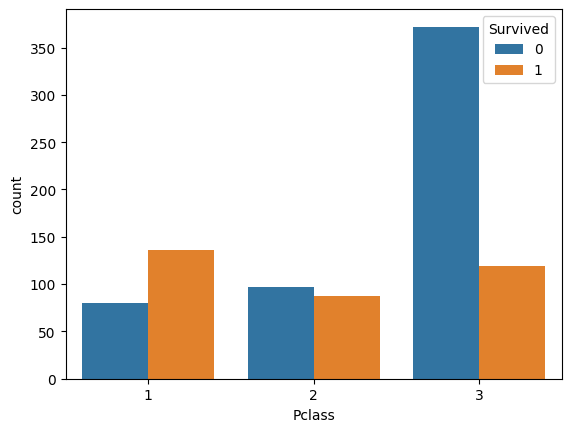

In [ ]:
ax = sns.countplot(x="Pclass", hue="Survived", data=df)

**-> Sex / Gender on Survivability analysis**

**Insights :**

The total no. of male passengers is much higher than that of female. But the survival rate in male passengers is much lower than that of female


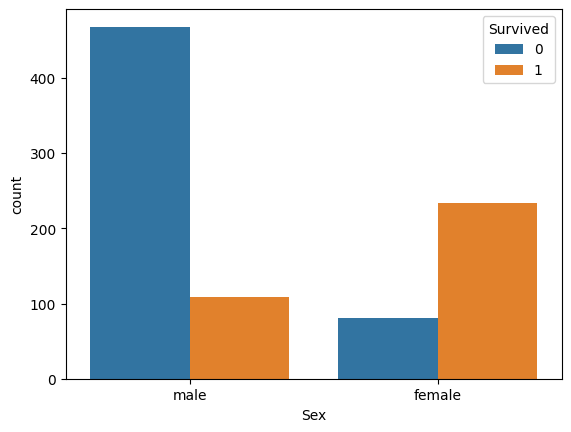

In [ ]:
ax = sns.countplot(x="Sex", hue="Survived", data=df)

**-> Family Members on Survivability analysis**

**Insights :**

1. Most of the passengers are travelling alone. No. of people with more than 2 family members are very less.
2. But the people who are travelling alone has death rate significantly higher than their survival rate.

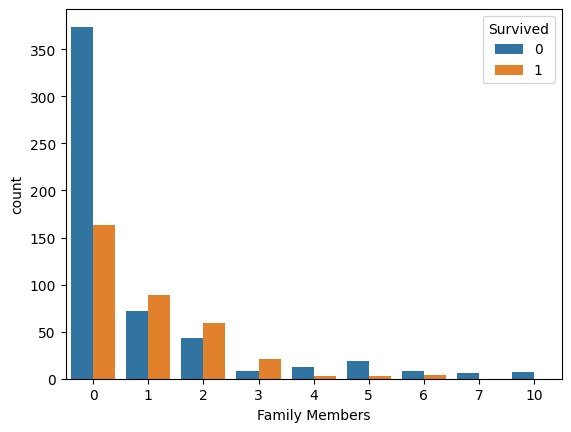

In [ ]:
ax = sns.countplot(x="Family Members", hue="Survived", data=df)

**-> Embarked on Survivability analysis**

**Insights :**

1. Most of the people embarked from Southampton, very less people embarked from Queenstown.
2. People embarked from 'Southampton' has the lowest survival rate and people embarked from 'Cherbourg' has the highest survival rate.

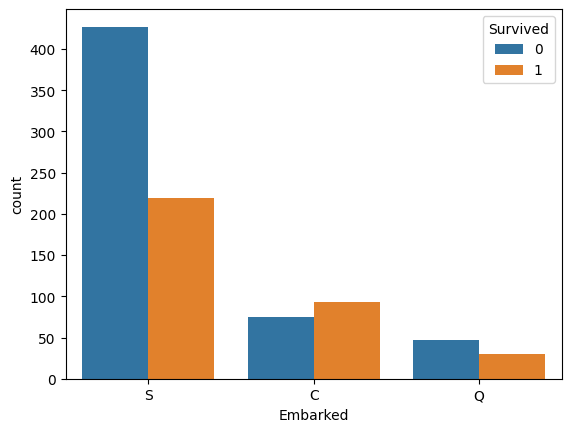

In [ ]:
ax = sns.countplot(x="Embarked", hue="Survived", data=df)

**-> Age Category on Survivability analysis**

**Insights :**

1. Most of the passengers belong from the 20-40 age category(Adults).
2. Children has the highest survival rate among all.
3. For adults death rate is much higher than survive rate.

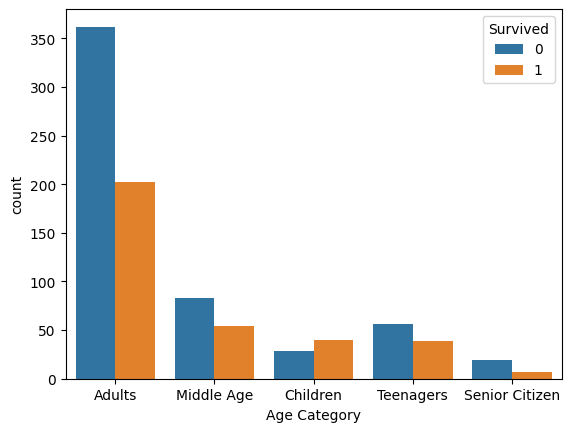

In [ ]:
ax = sns.countplot(x="Age Category", hue="Survived", data=df)

**-> Fare Category on Survivability analysis**

**Insights :**

1. Low fare tickets people has the lowest rate of survival.
2. High and Average fare people has high rate of survival.

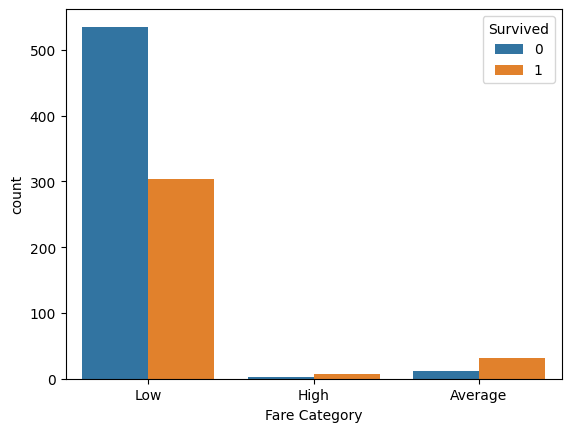

In [ ]:
ax = sns.countplot(x="Fare Category", hue="Survived", data=df)

# **DATA SCALING**

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Category,Fare Category,Family Members
0,0,3,male,22.0,1,0,7.2500,S,Adults,Low,1
1,1,1,female,38.0,1,0,71.2833,C,Adults,Low,1
2,1,3,female,26.0,0,0,7.9250,S,Adults,Low,0
3,1,1,female,35.0,1,0,53.1000,S,Adults,Low,1
4,0,3,male,35.0,0,0,8.0500,S,Adults,Low,0


**Encoding**

In [ ]:
for i in range(0, len(df)):
    if df['Sex'][i] == "male":
        df['Sex'][i] = 1
    if df['Sex'][i] == "female":
        df['Sex'][i] = 0

<ipython-input-35-c77ef02d05a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'][i] = 1
<ipython-input-35-c77ef02d05a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'][i] = 0


In [ ]:
for i in range(0, len(df)):
    if df['Embarked'][i] == "S":
        df['Embarked'][i] = 2
    if df['Embarked'][i] == "C":
        df['Embarked'][i] = 1
    if df['Embarked'][i] == "Q":
        df['Embarked'][i] = 0

<ipython-input-36-e735297bb3ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'][i] = 2
<ipython-input-36-e735297bb3ef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'][i] = 1
<ipython-input-36-e735297bb3ef>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'][i] = 0


In [ ]:
df['Age Category'].unique()

array(['Adults', 'Middle Age', 'Children', 'Teenagers', 'Senior Citizen'],
      dtype=object)

In [ ]:
for i in range(0, len(df)):
    if df['Age Category'][i] == "Senior Citizen":
        df['Age Category'][i] = 4
    if df['Age Category'][i] == "Middle Age":
        df['Age Category'][i] = 3
    if df['Age Category'][i] == "Adults":
        df['Age Category'][i] = 2
    if df['Age Category'][i] == "Teenagers":
        df['Age Category'][i] = 1
    if df['Age Category'][i] == "Children":
        df['Age Category'][i] = 0

<ipython-input-38-3eb49703e3f5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Category'][i] = 2
<ipython-input-38-3eb49703e3f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Category'][i] = 3
<ipython-input-38-3eb49703e3f5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Category'][i] = 0
<ipython-input-38-3eb49703e3f5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [ ]:
df['Fare Category'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [ ]:
for i in range(0, len(df)):
    if df['Fare Category'][i] == "High":
        df['Fare Category'][i] = 2
    if df['Fare Category'][i] == "Average":
        df['Fare Category'][i] = 1
    if df['Fare Category'][i] == "Low":
        df['Fare Category'][i] = 0

<ipython-input-40-416a19774d47>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare Category'][i] = 0
<ipython-input-40-416a19774d47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare Category'][i] = 2
<ipython-input-40-416a19774d47>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare Category'][i] = 1


**Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data = df

scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

data_scaled.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Category,Fare Category,Family Members
0,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.5,0.0,0.1
1,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,0.5,0.5,0.0,0.1
2,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,1.0,0.5,0.0,0.0
3,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,1.0,0.5,0.0,0.1
4,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.5,0.0,0.0


↑ Normalize with MinMaxScaler ↑

# **IMBALANCED DATASET**

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

**Random Undersampling**

Method : **resample** (from Scikit-Learn library)

In [ ]:
major_class = df[df['Survived']==0]
minor_class = df[df['Survived']==1]

In [ ]:
print(major_class.shape)
print(minor_class.shape)

(549, 11)
(342, 11)


In [ ]:
downsample_major = resample(major_class, replace=False, n_samples=342)
downsample_major.shape

(342, 11)

↑ Random Undersampling with 'resample' feature from Scikit-Learn library ↑

In [ ]:
balanced_titanic_data = pd.concat([downsample_major, minor_class])
balanced_titanic_data.shape

(684, 11)

In [ ]:
balanced_titanic_data[balanced_titanic_data['Survived'] == 0].shape

(342, 11)

In [ ]:
balanced_titanic_data[balanced_titanic_data['Survived'] == 1].shape

(342, 11)

↑ Balanced Titanic Data ↑

In [ ]:
balanced_titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Category,Fare Category,Family Members
350,0,3,1,23.0,0,0,9.2250,2,2,0,0
757,0,2,1,18.0,0,0,11.5000,2,1,0,0
282,0,3,1,16.0,0,0,9.5000,2,1,0,0
850,0,3,1,4.0,4,2,31.2750,2,0,0,6
534,0,3,0,30.0,0,0,8.6625,2,2,0,0


# **MACHINE LEARNING**
### Algorithm : **Logistic Regression**

**Train-Test Split**

In [ ]:
from sklearn.metrics import classification_report

y = balanced_titanic_data.drop(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age Category', 'Fare Category', 'Family Members'], axis = 1)
X = balanced_titanic_data.drop(['Survived'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

log_regress = LogisticRegression().fit(X_train, y_train)
 
log_results_downsamp = log_regress.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Classification Report** and **F1 Score**

In [ ]:
classification_report(y_test, log_results_downsamp)

'              precision    recall  f1-score   support\n\n           0       0.81      0.77      0.79       111\n           1       0.74      0.79      0.77        95\n\n    accuracy                           0.78       206\n   macro avg       0.78      0.78      0.78       206\nweighted avg       0.78      0.78      0.78       206\n'

In [ ]:
print(f1_score(y_test, log_results_downsamp))

0.7653061224489796


---

**END**

---

# **EXPORT FINAL TITANIC DATA**

In [ ]:
# Export Final Dataset into CSV file to Local Memory
from google.colab import files

balanced_titanic_data.to_csv('Final Titanic Data.csv') 
files.download('Final Titanic Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>